In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from IPython.display import display
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')

In [3]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [4]:
dftrain = pd.read_csv('../input/nasa-cmaps/CMaps/train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('../input/nasa-cmaps/CMaps/test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('../input/nasa-cmaps/CMaps/RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape

(13096, 26)

In [5]:
train = dftrain.copy()
valid = dfvalid.copy()

In [6]:
train

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [7]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (20631, 26)
Shape of the validation dataset :  (13096, 26)
Percentage of the validation dataset :  0.3882942449669404


In [8]:
#Cheking the presence of Nan values 
print('Total None values in the train dataset : ',train.isna().sum())

Total None values in the train dataset :  unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64


In [9]:
train.loc[:,['unit_number','time_cycles']].describe()


,unit_number,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [10]:
# desc = train.loc[:,'s_1':].describe().transpose()
desc = train.loc[:,:].describe().transpose()
desc['range'] = desc['max'] - desc['min']
desc['LB'] = desc['25%'] - 1.5*(desc['75%']-desc['25%'])
desc['UB'] = desc['75%'] + 1.5*(desc['75%']-desc['25%'])
desc['OUT_LB'] = desc['LB'] > desc['min']
desc['OUT_UB'] = desc['UB'] < desc['max']

desc.sort_values(by = ['std'], ascending= False)

,count,mean,std,min,25%,50%,75%,max,range,LB,UB,OUT_LB,OUT_UB
time_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000,361.0000,-104.00000,312.00000,False,True
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000,99.0000,-50.50000,153.50000,False,False
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900,222.8600,9028.62000,9093.90000,True,True
s_14,20631.0,8143.752722,1.907618e+01,8099.9400,8133.2450,8140.5400,8148.3100,8293.7200,193.7800,8110.64750,8170.90750,True,True
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900,59.2400,1384.06750,1432.84750,True,True
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100,45.8700,1574.08000,1606.56000,True,True
s_17,20631.0,393.210654,1.548763e+00,388.0000,392.0000,393.0000,394.0000,400.0000,12.0000,389.00000,397.00000,True,True
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600,6.2100,551.01000,555.81000,True,True
s_12,20631.0,521.413470,7.375534e-01,518.6900,520.9600,521.4800,521.9500,523.3800,4.6900,519.47500,523.43500,True,False
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300,3.3200,641.31250,644.01250,True,True


In [11]:
col_low_std = ['s_1', 's_5', 's_10', 's_16', 'setting_3', 's_18', 's_19']


In [71]:
nq = train.nunique().to_frame().reset_index()
nq.columns = ['columns', 'nunique']


# train.shape[0]
# nq['pct_constant'] = 1- nq['nunique']/train.shape[0]
nq['size_of_evidence'] = 1/nq['nunique']
nq.sort_values(by = ['size_of_evidence'], ascending =False)

,columns,nunique,size_of_evidence
22,s_18,1,1.000000
4,setting_3,1,1.000000
5,s_1,1,1.000000
20,s_16,1,1.000000
14,s_10,1,1.000000
9,s_5,1,1.000000
23,s_19,1,1.000000
10,s_6,2,0.500000
21,s_17,13,0.076923
3,setting_2,13,0.076923


In [13]:
col_low_unique = ['s_18', 'setting_3', 's_1', 's_16', 's_10', 's_5', 's_19', 's_6']

set(col_low_std)


{'s_1', 's_10', 's_16', 's_18', 's_19', 's_5', 'setting_3'}

In [14]:
def out_pct(df):
    outlier_stats = {}

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        percent_outliers = (len(outliers) / len(df)) * 100

        outlier_stats[col] = round(percent_outliers, 2)

    return pd.Series(outlier_stats, name="Outlier %").to_frame().reset_index()
out_pct(train).sort_values(by = ['Outlier %'], ascending =False)

,index,Outlier %
13,s_9,8.17
18,s_14,7.48
10,s_6,1.97
12,s_8,1.55
15,s_11,0.81
7,s_3,0.80
17,s_13,0.78
16,s_12,0.71
25,s_21,0.66
6,s_2,0.62


In [15]:
col_self_drop =  ["s_18", "setting_3", "s_1",  "s_16", "s_10", "s_5",	"s_19", "s_6", "unit_number", "time_cycles"]
col_low_correl_target = ["setting_1", "setting_2"]
col_high_multi_correl = []
col_to_drop = list(set(col_low_std + col_low_unique + col_self_drop))
col_to_drop

['s_10',
 's_5',
 'setting_3',
 's_19',
 's_18',
 'time_cycles',
 's_16',
 's_6',
 'unit_number',
 's_1']

In [16]:
correl = train.drop(columns = col_to_drop).corr()
shape = correl.shape[0]

for _ in correl.columns:
    correl.loc['abs_mean', _ ] = correl[_].abs().mean()
    correl.loc['abs_min', _ ] = correl[_].abs().min()
    correl.loc['abs_max', _ ] = correl[_].abs().max()
    correl.loc['abs_median', _ ] = correl[_].abs().median()
    
    
    

correl

,setting_1,setting_2,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
setting_1,1.000000,0.011660,0.009030,-0.005651,0.009544,-0.009437,-0.000427,-0.004279,0.011658,-0.001491,0.002318,-0.004469,0.007652,0.002599,-0.005713,-0.014559
setting_2,0.011660,1.000000,0.007266,0.009068,0.014673,-0.016678,0.013285,-0.005425,0.011690,-0.010923,0.018156,-0.006310,0.014156,0.012280,-0.010554,-0.007846
s_2,0.009030,0.007266,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050
s_3,-0.005651,0.009068,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901
s_4,0.009544,0.014673,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193
s_7,-0.009437,-0.016678,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447
s_8,-0.000427,0.013285,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840
s_9,-0.004279,-0.005425,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110,-0.285280,-0.292795
s_11,0.011658,0.011690,0.740020,0.695900,0.830136,-0.822805,0.782213,0.274591,1.000000,-0.846884,0.780761,0.163408,0.780913,0.722296,-0.771510,-0.772554
s_12,-0.001491,-0.010923,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.210238,-0.846884,1.000000,-0.788441,-0.098141,-0.766052,-0.703485,0.751943,0.756263


"s_18", "setting_3". "s_1",  "s_16", "s_10", "s_5",	"s_19", "s_6"	

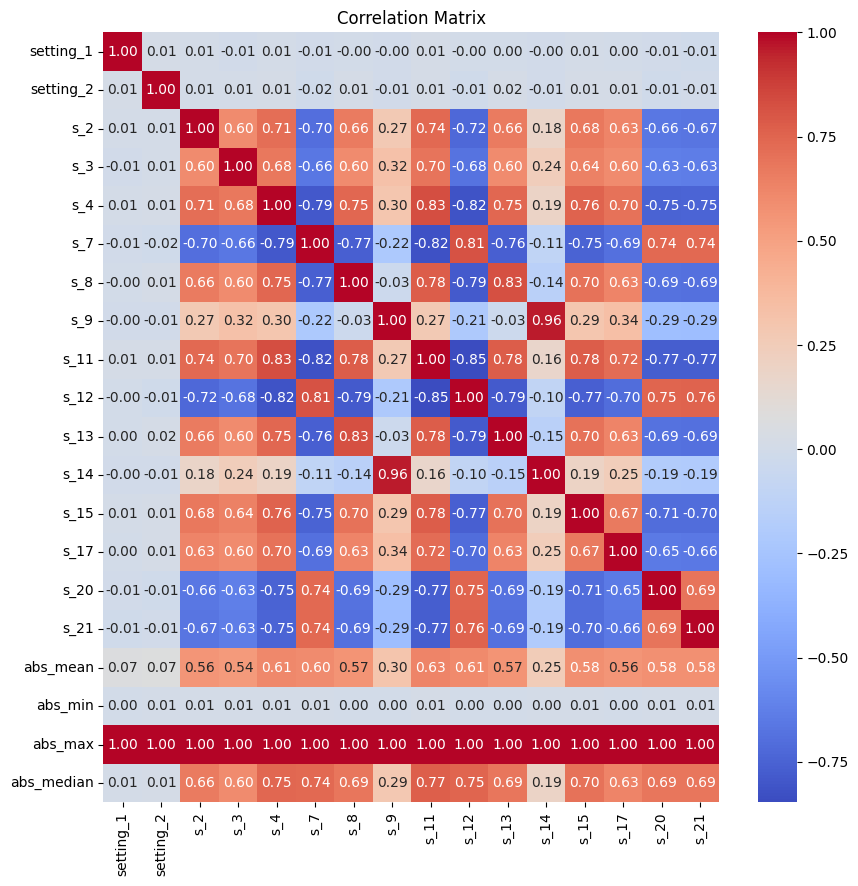

In [17]:

plt.figure(figsize=(10, 10))  # Adjust size as needed

sns.heatmap(correl, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title("Correlation Matrix")
plt.show()

In [18]:
# predictive_columns = ['s_8' 's_13' 's_4' 's_7' 's_15' 's_21' 's_20' 's_2' 's_17' 's_3'
#  's_14' 'setting_1' 'setting_2'] 

VIF calculation 

In [19]:
train.columns

Index(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21'],
      dtype='object')

In [20]:
!pip install statsmodels pandas


In [61]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


def vif(input_df):
    # Step 1: Add a constant (intercept) to the model
    X = add_constant(input_df)
    # Step 2: Calculate VIF for each variable
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by = ['VIF'], ascending = False )


vif_final  = vif(train.drop(columns= col_to_drop + ['s_9', 's_11', 's_12']))
# print(vif(train.drop(columns= ['time_cycles'], errors='ignore')))
print(vif_final, vif_final.shape, list(vif_final['feature'].unique()))
print(col_to_drop)

      feature           VIF
0       const  7.482479e+09
7         s_8  4.555238e+00
8        s_13  4.524099e+00
5         s_4  4.339453e+00
6         s_7  4.136973e+00
10       s_15  3.211882e+00
13       s_21  3.019300e+00
12       s_20  2.981346e+00
3         s_2  2.582178e+00
11       s_17  2.521309e+00
4         s_3  2.254754e+00
9        s_14  1.845496e+00
1   setting_1  1.001336e+00
2   setting_2  1.000698e+00 (14, 2) ['const', 's_8', 's_13', 's_4', 's_7', 's_15', 's_21', 's_20', 's_2', 's_17', 's_3', 's_14', 'setting_1', 'setting_2']
['s_10', 's_5', 'setting_3', 's_19', 's_18', 'time_cycles', 's_16', 's_6', 'unit_number', 's_1']


In [62]:
predictive_columns = ['s_8', 's_13', 's_4', 's_7', 's_15', 's_21', 's_20', 's_2', 's_17', 's_3', 's_14', 'setting_1', 'setting_2'].append('time_cycles')

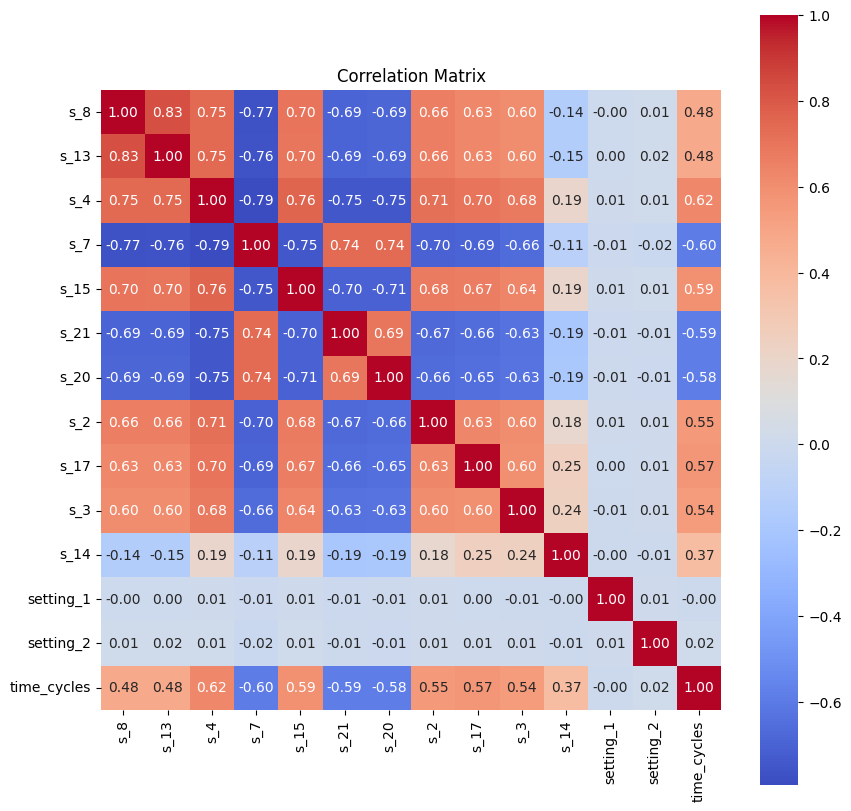

In [68]:

correl_with_target = train[predictive_columns].corr()
# print(predictive_columns)
# correl_with_target = train.corr()

shape = correl_with_target.shape[0]    
correl_with_target

plt.figure(figsize=(10, 10))  # Adjust size as needed

sns.heatmap(correl_with_target, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title("Correlation Matrix")
plt.show()

In [72]:
print(predictive_columns)

['s_8', 's_13', 's_4', 's_7', 's_15', 's_21', 's_20', 's_2', 's_17', 's_3', 's_14', 'setting_1', 'setting_2', 'time_cycles']
